In [9]:
import numpy as np; import pandas as pd; from matplotlib.pyplot import subplots;
from ISLP import load_data #La librería del libro de Hastie
from ISLP.models import (ModelSpec as MS,summarize,poly)

In [10]:
#Importamos librerias estadísticas
import statsmodels.api as sm 

In [22]:
Boston = load_data("Boston")
Boston.info

<bound method DataFrame.info of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax   
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296  \
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  medv  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2      

Queremos hacer una regresión del valor medio de la casa (variable *medv*) usando el promedio de cuartos por casa (la variable *lstat*); utilizaremos el método OLS (Ordinary Last squres) de la librería statsmodels: porque ésta contiene más informacióón estadística (como los p-valores). El modelo estadístico a considerar es:

\begin{equation}
 Y = X\beta + \mu
\end{equation} 


matricialmente en la regresión lineal simple:

\begin{equation}
\begin{split}
 [Y_1, Y_2, \cdots, Y_n]^T & = [\beta_0 + \beta_1X_1\beta_0 + \beta_1X_2 , \cdots, \beta_0 + \beta_1X_n]^T + [\mu_0, \mu_1, \cdots, \mu_n]^T 
 \\ & =  [ \vec{1_n} ~~~ | \vec{X} ] \vec{\beta} + \vec{\mu}
\end{split}
\end{equation} 


In [185]:
#Preparamos los datos para el modelo
x = sm.add_constant(Boston["lstat"]); y = Boston["medv"]

#Implementamos la regresión lineal
modelo = sm.OLS(y, x)       #Se especifica el modelo
resultados = modelo.fit()   #Aplicamos el modelo: calculamos los valores y el accuracy de éste


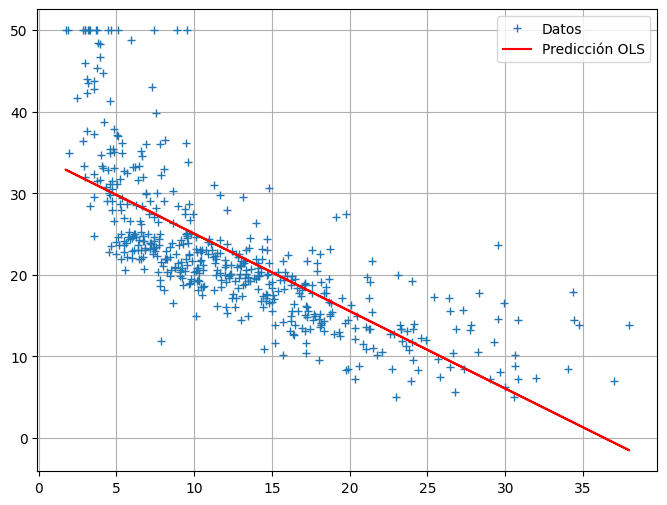

In [186]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(Boston["lstat"], Boston["medv"], "+", label="Datos")
ax.plot(Boston["lstat"], resultados.fittedvalues, "r-", label="Predicción OLS")
ax.legend(loc="best"); ax.grid()

Realizamos gráficos de diagnostico:

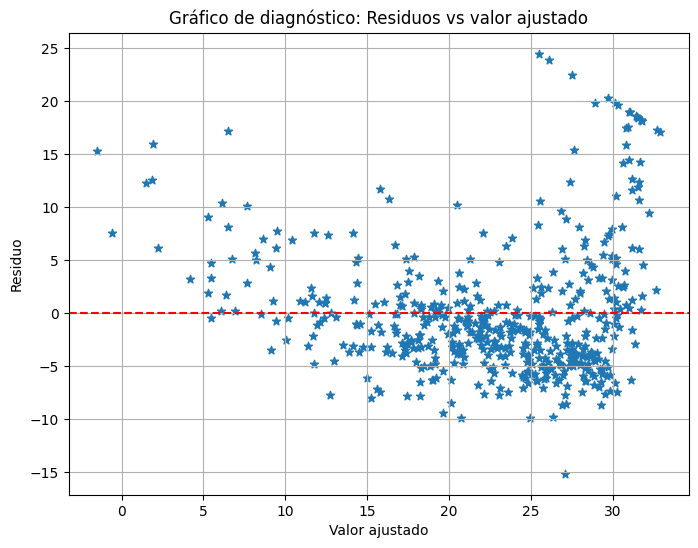

In [187]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(resultados.fittedvalues, resultados.resid, marker="*")
ax.set_title("Gráfico de diagnóstico: Residuos vs valor ajustado");ax.set_xlabel("Valor ajustado"); ax.set_ylabel("Residuo"); ax.grid()
ax.axhline(0, c="r", ls ="--"); plt.show()

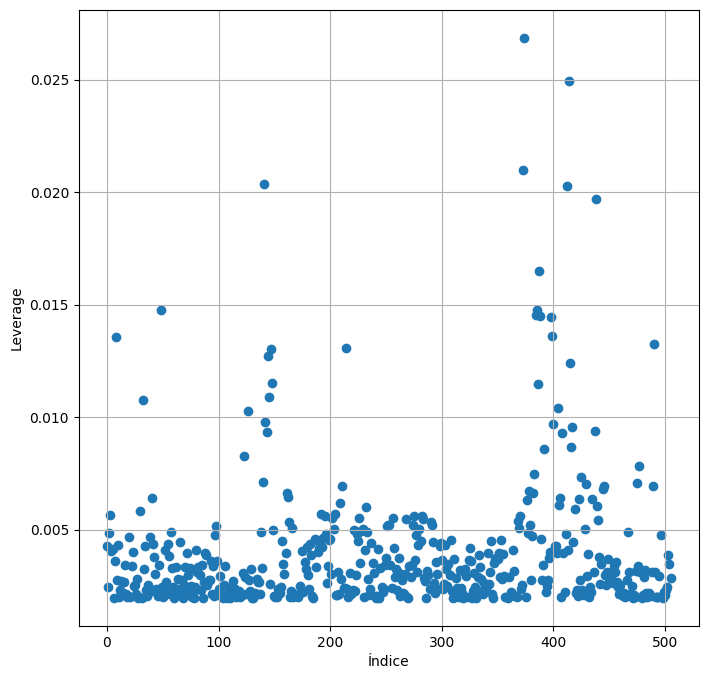

In [191]:
infl = resultados.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Índice')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag); plt.grid()

In [188]:
#Analizamos los resultados obtenidos
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           5.08e-88
Time:                        18:58:39   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

De lo anterior podemos concluir que el modelo que estamos utilizando no es factible considerarlo el más indiquado, vemos:
1. Vemos que el p-valores tan bajo, concluimos que en efecto existe una relación estadística entre las variables
2. El valor de $R^2$ es de 0.544: relativamente bajo. Es decir aproximadamente el 54.4% de la variabilidad de nuestra variable de respuesta puede ser explicada con el predictor seleccionado
3. Del gráfico diagnóstico (Residuo vs valor ajustado) concluimos que hay éstos siguen un patrón en forma de U: indicando así evidencia en contra de asumir linealidad en nuestro modelo.

## REGRESIÓN MÚLTIPLE
En el modelo matricial original, ahora tendremos un vector predictor con tantas columnas como predictores querrámos utilizar por lo que en consecuencia el vector $\beta$ también se verá modificado.

Ahora utilizaremos como predictores a las variables lstat & age:

In [265]:
#Implementamos el modelo, utilizando la notación de R
import statsmodels.formula.api as smf
resultados_2 = smf.ols(formula = "medv ~ lstat + age", data = Boston).fit()
resultados_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           2.98e-88
Time:                        22:25:35   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De lo anterior podemos concluir lo siguiente:
1. El error cuadrático medio es muy ligeramente superior que el modelo más simple (i,e: la variabilidad de la variable es explicada en un 55.1% por las variables del lstat & age).
2. Vemos que los p-valores asociados a cada variable son lo suficientemente pequeños para concluir que existe una relación estadística entre la variable "medv" con "lstat" & "age"